![title](../images/header.png)

Merging all CEO data (2015-2022/2023)
-------
This notebook merges validated data from different CEO CAFI projects
CEO data must be merged and harmonized using the merge clean ceo data scripts
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [2]:
#identifier for country 
# COD COG CMR GAB EQG CAF
iso = 'CAF'

In [3]:
# output file all CEO validated data file 
ceo_data_out =  '/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_2015_2020_2022_2023_clean.csv'

### 1. Read all CEO sample files

##### CEO data from phase I

In [4]:
ceo1520 = pd.read_csv('/home/sepal-user/CAFI_DDD/CAFI files/CAFI_all_ceo_validation_2015_2020_uniqueID.csv', low_memory=False)
ceo1520.reset_index(inplace=True)
ceo1520['collection']='coll_1520'
phase_I_columns = ceo1520.columns.tolist()
phase_I_columns

['index',
 'plotid_orig',
 'CEO_PLOTID',
 'lon',
 'lat',
 'ISO',
 'CEO_Ref_Code',
 'Ref_FNF_2015',
 'Ref_LCover_2015',
 'Ref_Change_Type_1520',
 'Ref_Year_1520',
 'countDrivers',
 'InfraR',
 'Urb',
 'ArtAg',
 'IndAg',
 'ArtFor',
 'IndFor',
 'ArtMine',
 'IndMine',
 'Other',
 'Source',
 'Ref_Change_Year_1520',
 'Change_Bin_1520',
 'UniqueID',
 'collection']

##### for 2015-2022 CEO sample data

##### use outputs from merge_clean_ceo_all_data

In [5]:
#EQG
ceo1522 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_1522_clean.csv')
ceo1522_columns = ceo1522.columns.tolist()
ceo1522_columns

['ID',
 'plotid',
 'point_id',
 'sampleid',
 'lon',
 'lat',
 'sample_geom',
 'Ref_FNF_2015',
 'Ref_Regeneration',
 'Ref_Change_1522',
 'Ref_Change_Type_1522',
 'ArtFor',
 'ArtMine',
 'InfraR',
 'Urb',
 'IndFor',
 'Other',
 'Other_Desc',
 'IndMine',
 'IndAg',
 'ArtAg',
 'Ref_Year_1522',
 'Ref_NFtype_2015',
 'Ref_Ftype_2015',
 'collection',
 'interpreted',
 'Ref_LCover_2015',
 'Ref_Change_Year_1522',
 'Ref_Change_LCover_1522',
 'Def2016',
 'Def2017',
 'Def2018',
 'Def2019',
 'Def2020',
 'Def2021',
 'Def2022',
 'Deg2016',
 'Deg2017',
 'Deg2018',
 'Deg2019',
 'Deg2020',
 'Deg2021',
 'Deg2022',
 'Defall',
 'Degall',
 'Stable',
 'NF',
 'DensFor',
 'DensDryFor',
 'SecFor',
 'DryOpenFor',
 'Mangrove',
 'Swamp',
 'Gallery',
 'Plantation',
 'Woodland',
 'Shrubland',
 'Grassland',
 'Aquatic',
 'Bare',
 'Cultivated',
 'Builtup',
 'Water',
 'DensFor_Def',
 'DensDryFor_Def',
 'SecFor_Def',
 'DryOpenFor_Def',
 'Mangrove_Def',
 'Swamp_Def',
 'Gallery_Def',
 'Plantation_Def',
 'Woodland_Def',
 'DensFor

In [6]:
ceo2023 = pd.read_csv('/home/sepal-user/module_results/esbae/CAR/CAR_all_ceo_2023_clean.csv')
ceo2023_columns = ceo2023.columns.tolist()
ceo2023_columns

['ID',
 'plotid',
 'sampleid',
 'lon',
 'lat',
 'TNT_stratum',
 'sample_geom',
 'Ref_FNF_2022',
 'Ref_Regeneration',
 'Ref_Change_2023',
 'Ref_Change_Type_2023',
 'ArtFor',
 'ArtMine',
 'InfraR',
 'Urb',
 'IndFor',
 'Other',
 'Other_Desc',
 'IndMine',
 'IndAg',
 'ArtAg',
 'Ref_NFtype_2022',
 'Ref_Ftype_2022',
 'collection',
 'interpreted',
 'Ref_LCover_2022',
 'Ref_Change_Year_2023',
 'Ref_Change_LCover_2023',
 'Def2023',
 'Deg2023',
 'Defall',
 'Degall',
 'Stable',
 'NF',
 'DensFor',
 'DensDryFor',
 'SecFor',
 'DryOpenFor',
 'Mangrove',
 'Swamp',
 'Gallery',
 'Plantation',
 'Woodland',
 'Shrubland',
 'Grassland',
 'Aquatic',
 'Bare',
 'Cultivated',
 'Builtup',
 'Water',
 'DensFor_Def',
 'DensDryFor_Def',
 'SecFor_Def',
 'DryOpenFor_Def',
 'Mangrove_Def',
 'Swamp_Def',
 'Gallery_Def',
 'Plantation_Def',
 'Woodland_Def',
 'DensFor_Deg',
 'DensDryFor_Deg',
 'SecFor_Deg',
 'DryOpenFor_Deg',
 'Mangrove_Deg',
 'Swamp_Deg',
 'Gallery_Deg',
 'Plantation_Deg',
 'Woodland_Deg',
 'DensFor_stable

### end of parameters

In [7]:
ceo1520 = ceo1520.loc[ceo1520['ISO'] == iso]

In [8]:
len(ceo1520)

2325

In [9]:
len(ceo1522)

4377

In [10]:
len(ceo2023)

1678

### merge all

In [11]:
data_frames =[ceo1520, ceo1522, ceo2023]
# Source file names corresponding to each data frame
source_file = ['ceo_1520','ceo_1522', 'ceo_2023']  # Replace with your file names

# Merge data frames and add a new column for source file name
merged_ceo = pd.concat([df.assign(sampling=source_file) for df, source_file in zip(data_frames, source_file)], ignore_index=True)

In [12]:
merged_ceo.head()

,index,plotid_orig,CEO_PLOTID,lon,lat,ISO,CEO_Ref_Code,Ref_FNF_2015,Ref_LCover_2015,Ref_Change_Type_1520,Ref_Year_1520,countDrivers,InfraR,Urb,ArtAg,IndAg,ArtFor,IndFor,ArtMine,IndMine,Other,Source,Ref_Change_Year_1520,Change_Bin_1520,UniqueID,collection,sampling,ID,plotid,point_id,sampleid,sample_geom,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,Other_Desc,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,interpreted,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_stable,DensDryFor_stable,SecFor_stable,DryOpenFor_stable,Mangrove_stable,Swamp_stable,Gallery_stable,Plantation_stable,Woodland_stable,TNT_stratum,Ref_FNF_2022,Ref_Change_2023,Ref_Change_Type_2023,Ref_NFtype_2022,Ref_Ftype_2022,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023
0,0.0,171.0,NaN,24.043094,6.731301,CAF,12.0,0.0,12.0,NF,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,NF,0.0,306.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,140.0,NaN,18.704676,8.068803,CAF,12.0,0.0,12.0,NF,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,NF,0.0,307.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,174.0,NaN,23.944998,7.158989,CAF,12.0,0.0,12.0,NF,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,NF,0.0,309.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33.0,74.0,NaN,16.946763,4.172719,CAF,1.0,1.0,1.0,Stable,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,Stable,0.0,134.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,126.0,133.0,NaN,16.418823,4.139033,CAF,1.0,1.0,1.0,Stable,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,Stable,0.0,227.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
len(merged_ceo)

8380

In [14]:
merged_ceo['collection'].value_counts(dropna=False)

collection
coll_1522_2    3878
coll_1520      2325
coll_2023_2     798
coll_1522_1     499
coll_2023_1     497
coll_2023_3     383
Name: count, dtype: int64

In [15]:
ceo_column_names = merged_ceo.columns.tolist()
# Print the list of column names
ceo_column_names

['index',
 'plotid_orig',
 'CEO_PLOTID',
 'lon',
 'lat',
 'ISO',
 'CEO_Ref_Code',
 'Ref_FNF_2015',
 'Ref_LCover_2015',
 'Ref_Change_Type_1520',
 'Ref_Year_1520',
 'countDrivers',
 'InfraR',
 'Urb',
 'ArtAg',
 'IndAg',
 'ArtFor',
 'IndFor',
 'ArtMine',
 'IndMine',
 'Other',
 'Source',
 'Ref_Change_Year_1520',
 'Change_Bin_1520',
 'UniqueID',
 'collection',
 'sampling',
 'ID',
 'plotid',
 'point_id',
 'sampleid',
 'sample_geom',
 'Ref_Regeneration',
 'Ref_Change_1522',
 'Ref_Change_Type_1522',
 'Other_Desc',
 'Ref_Year_1522',
 'Ref_NFtype_2015',
 'Ref_Ftype_2015',
 'interpreted',
 'Ref_Change_Year_1522',
 'Ref_Change_LCover_1522',
 'Def2016',
 'Def2017',
 'Def2018',
 'Def2019',
 'Def2020',
 'Def2021',
 'Def2022',
 'Deg2016',
 'Deg2017',
 'Deg2018',
 'Deg2019',
 'Deg2020',
 'Deg2021',
 'Deg2022',
 'Defall',
 'Degall',
 'Stable',
 'NF',
 'DensFor',
 'DensDryFor',
 'SecFor',
 'DryOpenFor',
 'Mangrove',
 'Swamp',
 'Gallery',
 'Plantation',
 'Woodland',
 'Shrubland',
 'Grassland',
 'Aquatic',

### 2. Combine and consolidate columns

In [16]:
#Ref_LCover will be blank where LCover is NF in 2022, because it could have been forest in 2015
# Create a new column by concatenating Ref_LCover, Ref_LCover_2015, and Ref_FType_2022
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].fillna(merged_ceo['Ref_Ftype_2022'])
merged_ceo['Ref_LCover_2015'].value_counts(dropna=False)

Ref_LCover_2015
12.0    1942
11.0    1294
15.0    1026
NaN      985
13.0     880
1.0      599
4.0      578
2.0      320
9.0      313
3.0      203
16.0     194
8.0       17
14.0      15
17.0      10
10.0       4
Name: count, dtype: int64

In [17]:
# Create the new 'Ref_FNF' column
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].astype(float)

condition = merged_ceo['Ref_LCover_2015'] < 12

# Apply the condition using numpy.where
merged_ceo['Ref_FNF_2015'] = np.where(condition, 1, 
                                             np.where(merged_ceo['Ref_LCover_2015'].notna(), 0, np.nan))
merged_ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
0.0    4067
1.0    3328
NaN     985
Name: count, dtype: int64

In [18]:
merged_ceo['Ref_Change_Type_1523'] = merged_ceo['Ref_Change_Type_1520'].fillna(merged_ceo['Ref_Change_Type_1522']).fillna(merged_ceo['Ref_Change_Type_2023'])

# Set rows where Ref_Change_Type_2023 is 'NF' to NaN
merged_ceo.loc[merged_ceo['Ref_Change_Type_2023'] == 'NF', 'Ref_Change_Type'] = pd.NA

# Print the value counts
print(merged_ceo['Ref_Change_Type_1523'].value_counts(dropna=False))

Ref_Change_Type_1523
NF        4410
Stable    3381
Def        330
Deg        259
Name: count, dtype: int64


In [19]:
merged_ceo['Ref_Change_Year_1523'] = merged_ceo['Ref_Change_Year_1520'].fillna(merged_ceo['Ref_Change_Year_1522']).fillna(merged_ceo['Ref_Change_Year_2023'])
merged_ceo['Ref_Change_Year_1523'].value_counts(dropna=False)

Ref_Change_Year_1523
NF         4410
Stable     3381
Def2017      91
Def2018      90
Deg2017      57
Def2019      57
Def2016      55
Deg2018      53
Deg2016      45
Deg2023      34
Deg2019      30
Deg2020      22
Def2020      17
Deg2022      12
Def2021      10
Def2022       6
Deg2021       6
Def2023       4
Name: count, dtype: int64

In [20]:
pd.pivot_table(merged_ceo,values='plotid',index=['Ref_Change_Year_1523'],columns=['collection'],aggfunc="count",margins=True,
                             margins_name='Total')

collection,coll_1520,coll_1522_1,coll_1522_2,coll_2023_1,coll_2023_2,coll_2023_3,Total
Ref_Change_Year_1523,,,,,,,
Def2016,0.0,NaN,5.0,NaN,NaN,NaN,5.0
Def2017,0.0,4.0,3.0,NaN,NaN,NaN,7.0
Def2018,0.0,1.0,6.0,NaN,NaN,NaN,7.0
Def2019,0.0,NaN,3.0,NaN,NaN,NaN,3.0
Def2020,0.0,NaN,1.0,NaN,NaN,NaN,1.0
Def2021,NaN,NaN,10.0,NaN,NaN,NaN,10.0
Def2022,NaN,2.0,4.0,NaN,NaN,NaN,6.0
Def2023,NaN,NaN,NaN,NaN,2.0,2.0,4.0
Deg2016,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
merged_ceo['ISO'] = iso

In [22]:
merged_ceo_column_names = merged_ceo.columns.tolist()
# Print the list of column names
merged_ceo_column_names

['index',
 'plotid_orig',
 'CEO_PLOTID',
 'lon',
 'lat',
 'ISO',
 'CEO_Ref_Code',
 'Ref_FNF_2015',
 'Ref_LCover_2015',
 'Ref_Change_Type_1520',
 'Ref_Year_1520',
 'countDrivers',
 'InfraR',
 'Urb',
 'ArtAg',
 'IndAg',
 'ArtFor',
 'IndFor',
 'ArtMine',
 'IndMine',
 'Other',
 'Source',
 'Ref_Change_Year_1520',
 'Change_Bin_1520',
 'UniqueID',
 'collection',
 'sampling',
 'ID',
 'plotid',
 'point_id',
 'sampleid',
 'sample_geom',
 'Ref_Regeneration',
 'Ref_Change_1522',
 'Ref_Change_Type_1522',
 'Other_Desc',
 'Ref_Year_1522',
 'Ref_NFtype_2015',
 'Ref_Ftype_2015',
 'interpreted',
 'Ref_Change_Year_1522',
 'Ref_Change_LCover_1522',
 'Def2016',
 'Def2017',
 'Def2018',
 'Def2019',
 'Def2020',
 'Def2021',
 'Def2022',
 'Deg2016',
 'Deg2017',
 'Deg2018',
 'Deg2019',
 'Deg2020',
 'Deg2021',
 'Deg2022',
 'Defall',
 'Degall',
 'Stable',
 'NF',
 'DensFor',
 'DensDryFor',
 'SecFor',
 'DryOpenFor',
 'Mangrove',
 'Swamp',
 'Gallery',
 'Plantation',
 'Woodland',
 'Shrubland',
 'Grassland',
 'Aquatic',

In [23]:
merged_ceo = merged_ceo.drop(columns=['DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation',
                              'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water',
                              'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 
                              'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 
                              'DryOpenFor_Deg', 'Mangrove_Deg', 'Swamp_Deg', 'Gallery_Deg', 'Plantation_Deg', 'Woodland_Deg', 
                              'DensFor_stable', 'DensDryFor_stable', 'SecFor_stable', 'DryOpenFor_stable', 'Mangrove_stable',
                              'Swamp_stable', 'Gallery_stable', 'Plantation_stable','Woodland_stable'
                             ])

### 3. plot change points by year

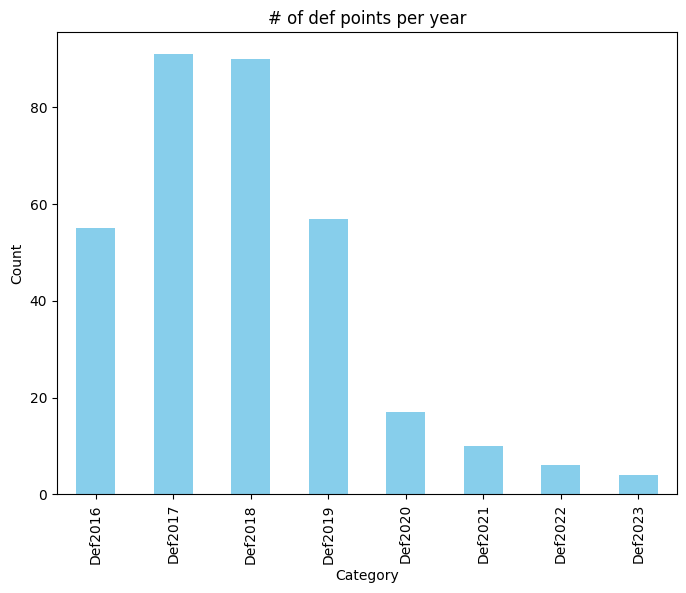

In [25]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Def2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1523'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1523'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

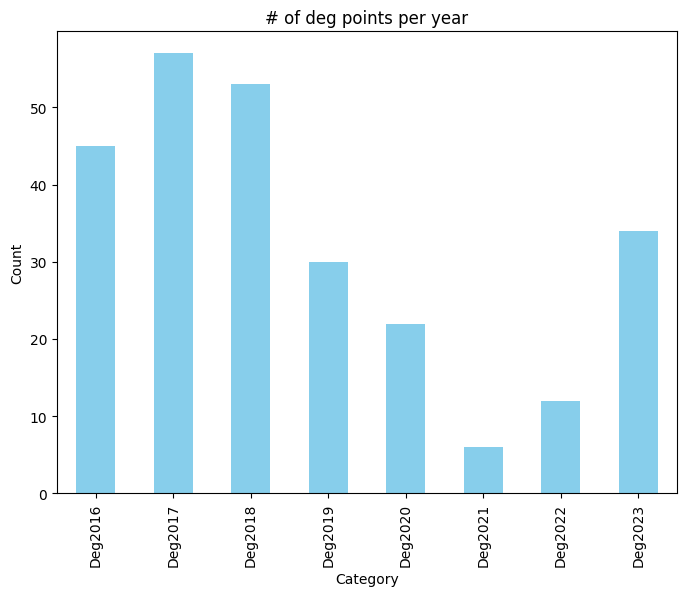

In [26]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','Deg2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1523'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1523'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [27]:
merged_ceo.head()

,index,plotid_orig,CEO_PLOTID,lon,lat,ISO,CEO_Ref_Code,Ref_FNF_2015,Ref_LCover_2015,Ref_Change_Type_1520,Ref_Year_1520,countDrivers,InfraR,Urb,ArtAg,IndAg,ArtFor,IndFor,ArtMine,IndMine,Other,Source,Ref_Change_Year_1520,Change_Bin_1520,UniqueID,collection,sampling,ID,plotid,point_id,sampleid,sample_geom,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,Other_Desc,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,interpreted,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,TNT_stratum,Ref_FNF_2022,Ref_Change_2023,Ref_Change_Type_2023,Ref_NFtype_2022,Ref_Ftype_2022,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023,Ref_Change_Type_1523,Ref_Change_Type,Ref_Change_Year_1523
0,0.0,171.0,NaN,24.043094,6.731301,CAF,12.0,0.0,12.0,NF,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,NF,0.0,306.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NF,NaN,NF
1,1.0,140.0,NaN,18.704676,8.068803,CAF,12.0,0.0,12.0,NF,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,NF,0.0,307.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NF,NaN,NF
2,3.0,174.0,NaN,23.944998,7.158989,CAF,12.0,0.0,12.0,NF,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,NF,0.0,309.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NF,NaN,NF
3,33.0,74.0,NaN,16.946763,4.172719,CAF,1.0,1.0,1.0,Stable,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,Stable,0.0,134.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,NaN,Stable
4,126.0,133.0,NaN,16.418823,4.139033,CAF,1.0,1.0,1.0,Stable,NaN,0.0,0,0,0,0,0,0,0,0,0,ceo,Stable,0.0,227.0,coll_1520,ceo_1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stable,NaN,Stable


### 4. export ceo data to one csv file

In [28]:
merged_ceo.to_csv(ceo_data_out,index_label='UID')